### CSCM45J Big Data and Machine Learning Coursework - Object Recognition



In [24]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import pandas as pd
from scipy import stats
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D
print(tf.__version__)

2.4.0


In [2]:
def plot_acc_loss(history):
    
    plt.figure(figsize=[10,5])
    plt.subplot(121)
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy',
               'Validation Accuracy'])
    plt.title('Accuracy Curves')

    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss',
               'Validation Loss'])
    plt.title('Loss Curves')
    
    return plt.show()

In [3]:
def create_cnn_model(activation, kernel_size, pooling_size, labels):

    cnn_model = tf.keras.Sequential()
    cnn_model.add(Conv2D(32, kernel_size, activation = activation, input_shape = (32, 32, 3)))
    cnn_model.add(layers.MaxPooling2D((pooling_size)))

    cnn_model.add(layers.Conv2D(64, kernel_size, activation = activation))
    cnn_model.add(layers.MaxPooling2D(pooling_size))

    cnn_model.add(layers.Conv2D(128, kernel_size, activation = activation))
    cnn_model.add(layers.MaxPool2D(pooling_size))

    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(64, activation = activation))
    cnn_model.add(layers.Dense(len(np.unique(labels)), activation=tf.nn.softmax))
    
    cnn_model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics = tf.keras.metrics.SparseCategoricalAccuracy())
    
    return cnn_model

In [4]:
def run_cnn_model(cnn_model, epochs, labels):
    
    history_cnn = cnn_model.fit(train_images, labels, validation_split = 0.2, epochs = epochs , verbose=1)
    
    return history_cnn

In [5]:
def create_nn_model(activation, labels):
    nn_model = tf.keras.Sequential(layers = [tf.keras.layers.Dense(576, activation = activation),
#                                      tf.keras.layers.Dense(800, activation = activation),
                                     tf.keras.layers.Dense(250, activation = activation),
                                     tf.keras.layers.Dense(100, activation = activation),
                                     tf.keras.layers.Dense(50, activation = activation),
#                                      tf.keras.layers.Dropout(rate=0.5),
#                                      tf.keras.layers.Dense(25, activation = activation),
                                     tf.keras.layers.Dense(len(np.unique(labels)), activation=tf.nn.softmax)])

    nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                  metrics = tf.keras.metrics.SparseCategoricalAccuracy())
    
    return nn_model

In [6]:
def run_nn_model(nn_model, epochs, labels):
    
    history_nn = nn_model.fit(X_train, labels, validation_split = 0.2, epochs = epochs , verbose=1)
    
    return history_nn

In [44]:
def create_display_cm(y_test_label, prediction):
    
    confusion_mat = confusion_matrix(y_test_label, prediction)

    display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat)

    fig, ax = plt.subplots(figsize=(12,12))
    display.plot(ax=ax)   

In [7]:
train_images = np.load('./trnImage.npy')
y_train_coarse = np.load('./trnLabel_coarse.npy')
y_train_fine = np.load('./trnLabel_fine.npy')

print(train_images.shape)
print(y_train_coarse.shape)
print(y_train_fine.shape)

(32, 32, 3, 50000)
(50000,)
(50000,)


In [8]:
test_images = np.load('./tstImage.npy')
y_test_coarse = np.load('./tstLabel_coarse.npy')
y_test_fine = np.load("./tstLabel_fine.npy")

print(test_images.shape)
print(y_test_coarse.shape)
print(y_test_fine.shape)

(32, 32, 3, 10000)
(10000,)
(10000,)


In [9]:
train_images = np.transpose(train_images, [3, 0, 1, 2])
print(train_images.shape)

test_images = np.transpose(test_images, [3, 0, 1, 2])
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Epoch 1/12
1250/1250 [==============================] - 23s 18ms/step - loss: 2.6929 - sparse_categorical_accuracy: 0.1620 - val_loss: 2.3158 - val_sparse_categorical_accuracy: 0.2841
Epoch 2/12
1250/1250 [==============================] - 22s 18ms/step - loss: 2.1539 - sparse_categorical_accuracy: 0.3324 - val_loss: 1.9948 - val_sparse_categorical_accuracy: 0.3837
Epoch 3/12
1250/1250 [==============================] - 24s 19ms/step - loss: 1.9063 - sparse_categorical_accuracy: 0.4044 - val_loss: 1.9107 - val_sparse_categorical_accuracy: 0.4134
Epoch 4/12
1250/1250 [==============================] - 23s 19ms/step - loss: 1.7677 - sparse_categorical_accuracy: 0.4494 - val_loss: 1.8229 - val_sparse_categorical_accuracy: 0.4339
Epoch 5/12
1250/1250 [==============================] - 21s 17ms/step - loss: 1.6671 - sparse_categorical_accuracy: 0.4759 - val_loss: 1.7501 - val_sparse_categorical_accuracy: 0.4566
Epoch 6/12
1250/1250 [==============================] - 22s 18ms/step - loss: 1.

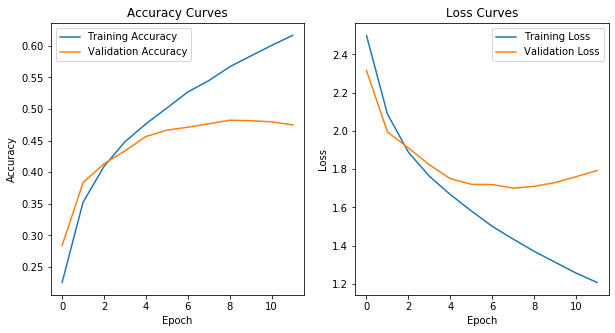

313/313 [==============================] - 1s 4ms/step - loss: 1.8034 - sparse_categorical_accuracy: 0.4755


In [46]:
cnn_model_1 = create_cnn_model(activation = 'relu', kernel_size = 3, pooling_size = 2, labels = y_train_coarse)

cnn_history_1 = run_cnn_model(cnn_model_1, 12, y_train_coarse)

plot_acc_loss(cnn_history_1)

result = cnn_model_1.evaluate(test_images, y_test_coarse)

In [47]:
y_pred_cnn = nn_model_1.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

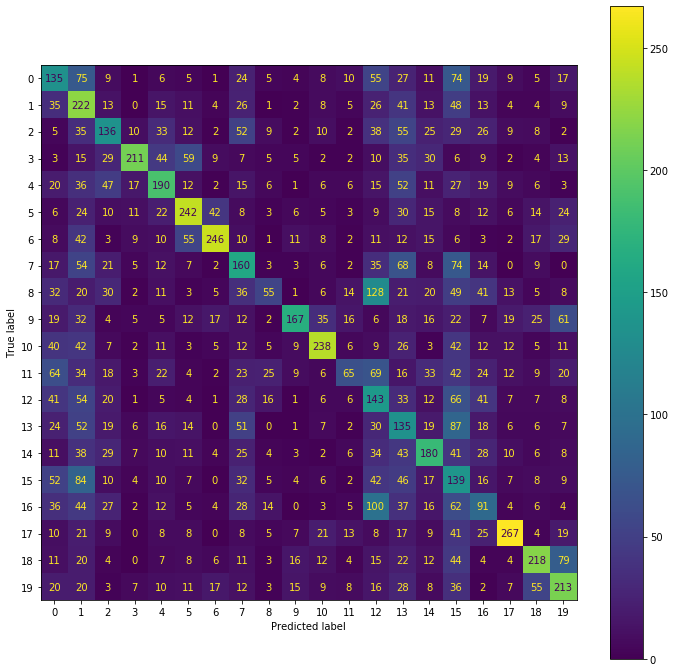

In [49]:
create_display_cm(y_test_coarse, y_pred_cnn)

In [ ]:
leaky_relu = LeakyReLU(alpha = 0.02)

cnn_model_2 = create_cnn_model(activation = leaky_relu, kernel_size = 3, pooling_size = 2, labels = y_train_coarse)

cnn_history_2 = run_cnn_model(cnn_model_2, 12, y_train_coarse)

plot_acc_loss(cnn_history_2)

result = cnn_model_2.evaluate(test_images, y_test_coarse)

In [ ]:
cnn_model_3 = create_cnn_model(activation = 'relu', kernel_size = 3, pooling_size = 2, labels = y_train_fine)

cnn_history_3 = run_cnn_model(cnn_model_3, 12, y_train_fine)

plot_acc_loss(cnn_history_3)

result = cnn_model_3.evaluate(test_images, y_test_fine)

In [ ]:
leaky_relu = LeakyReLU(alpha = 0.02)

cnn_model_4 = create_cnn_model(activation = leaky_relu, kernel_size = 3, pooling_size = 2, labels = y_train_fine)

cnn_history_4 = run_cnn_model(cnn_model_4, 12, y_train_fine)

plot_acc_loss(cnn_history_4)

result = cnn_model_4.evaluate(test_images, y_test_fine)

In [10]:
X_train = np.zeros((576, 50000))
X_test = np.zeros((576, 10000))

In [11]:
for train_i in range(50000):
    train_feature = skimage.feature.hog(train_images[train_i, :, :, :], pixels_per_cell=[6,6], cells_per_block=[2,2], 
                                        visualize = False, multichannel = True, block_norm = 'L2-Hys')
    X_train[:, train_i] = train_feature

for test_i in range(10000):
    test_feature = skimage.feature.hog(test_images[test_i, :, :, :], pixels_per_cell=[6,6], cells_per_block=[2,2], 
                                       visualize = False, multichannel = True, block_norm = 'L2-Hys')
    X_test[:, test_i] = test_feature

print(X_train.shape)
print(X_test.shape)

(576, 50000)
(576, 10000)


In [12]:
X_train = np.transpose(X_train, [1,0])
print(f'Shape of transposed: {X_train.shape}')

X_test = np.transpose(X_test, [1,0])
print(f'Shape of transposed: {X_test.shape}')

Shape of transposed: (50000, 576)
Shape of transposed: (10000, 576)


Epoch 1/25
1250/1250 [==============================] - 4s 3ms/step - loss: 2.9103 - sparse_categorical_accuracy: 0.0866 - val_loss: 2.6773 - val_sparse_categorical_accuracy: 0.1609
Epoch 2/25
1250/1250 [==============================] - 3s 3ms/step - loss: 2.6439 - sparse_categorical_accuracy: 0.1658 - val_loss: 2.6011 - val_sparse_categorical_accuracy: 0.1835
Epoch 3/25
1250/1250 [==============================] - 3s 3ms/step - loss: 2.5598 - sparse_categorical_accuracy: 0.1954 - val_loss: 2.5256 - val_sparse_categorical_accuracy: 0.2081
Epoch 4/25
1250/1250 [==============================] - 3s 3ms/step - loss: 2.4453 - sparse_categorical_accuracy: 0.2321 - val_loss: 2.3923 - val_sparse_categorical_accuracy: 0.2547
Epoch 5/25
1250/1250 [==============================] - 3s 3ms/step - loss: 2.3461 - sparse_categorical_accuracy: 0.2711 - val_loss: 2.3709 - val_sparse_categorical_accuracy: 0.2652
Epoch 6/25
1250/1250 [==============================] - 3s 3ms/step - loss: 2.2819 - spars

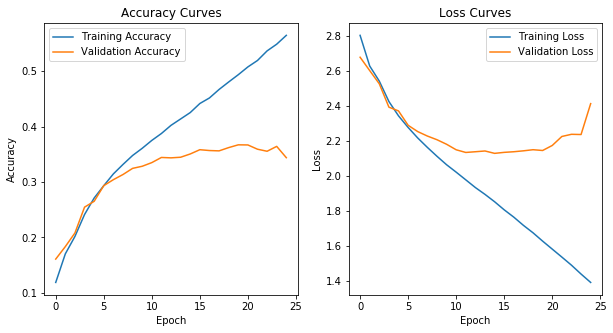

313/313 [==============================] - 0s 1ms/step - loss: 2.3656 - sparse_categorical_accuracy: 0.3453


In [21]:
nn_model_1 = create_nn_model('sigmoid', y_train_coarse)

nn_history_1 = run_nn_model(nn_model_1, 25, y_train_coarse)

plot_acc_loss(nn_history_1)

result = nn_model_1.evaluate(X_test, y_test_coarse)

In [38]:
y_pred = nn_model_1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

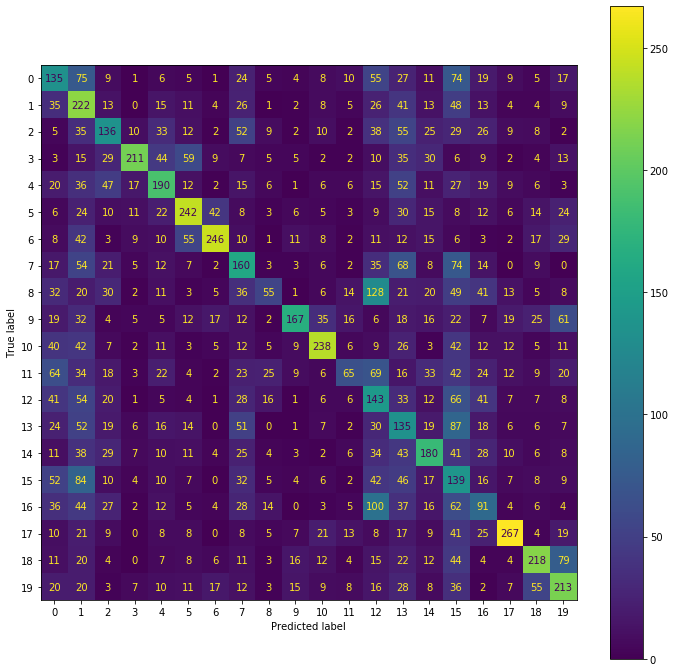

In [45]:
create_display_cm(y_test_coarse, y_pred)

Epoch 1/35
1250/1250 [==============================] - 4s 3ms/step - loss: 4.6100 - sparse_categorical_accuracy: 0.0111 - val_loss: 4.4272 - val_sparse_categorical_accuracy: 0.0279
Epoch 2/35
1250/1250 [==============================] - 3s 3ms/step - loss: 4.3446 - sparse_categorical_accuracy: 0.0332 - val_loss: 4.1509 - val_sparse_categorical_accuracy: 0.0517
Epoch 3/35
1250/1250 [==============================] - 4s 3ms/step - loss: 4.0520 - sparse_categorical_accuracy: 0.0676 - val_loss: 4.0006 - val_sparse_categorical_accuracy: 0.0700
Epoch 4/35
1250/1250 [==============================] - 4s 3ms/step - loss: 3.9021 - sparse_categorical_accuracy: 0.0869 - val_loss: 3.8360 - val_sparse_categorical_accuracy: 0.1009
Epoch 5/35
1250/1250 [==============================] - 3s 3ms/step - loss: 3.7452 - sparse_categorical_accuracy: 0.1164 - val_loss: 3.7396 - val_sparse_categorical_accuracy: 0.1209
Epoch 6/35
1250/1250 [==============================] - 3s 3ms/step - loss: 3.6421 - spars

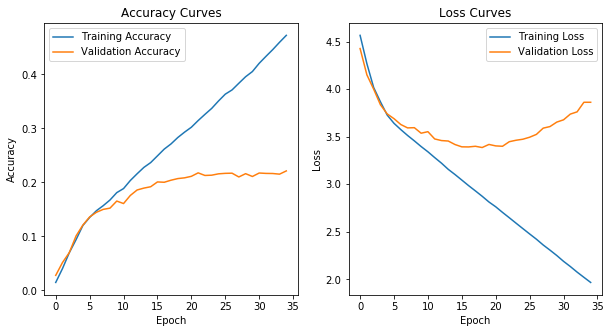

313/313 [==============================] - 0s 1ms/step - loss: 3.7864 - sparse_categorical_accuracy: 0.2222


In [32]:
nn_model_2 = create_nn_model('sigmoid', y_train_fine)

nn_history_2 = run_nn_model(nn_model_2, 35, y_train_fine)

plot_acc_loss(nn_history_2)

result = nn_model_2.evaluate(X_test, y_test_fine)

In [34]:
y_pred_2 = nn_model_2.predict(X_test)
y_pred_2 = np.argmax(y_pred_2, axis=1)

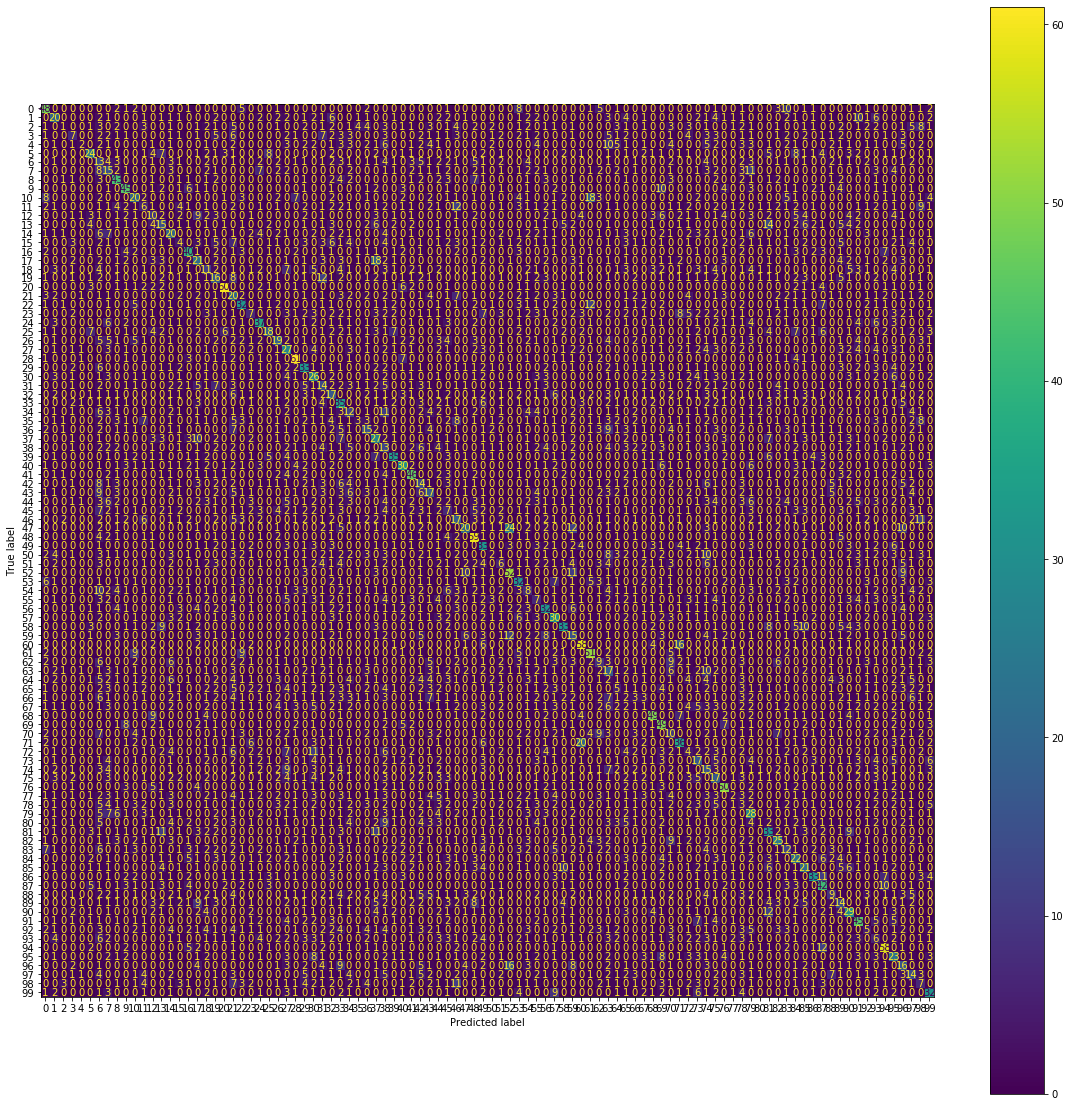

In [40]:
create_display_cm(y_test_fine, y_pred_2)

In [ ]:
# rand_params = {"C": stats.uniform(2, 10),
#              "gamma": stats.uniform(0.1, 1)}

In [ ]:
# param_grid = {'C': [1, 3, 5, 10],
#               'kernel': ['poly', 'sigmoid', 'linear']}

In [ ]:
# grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 2, cv = 3)
# grid = RandomizedSearchCV(svm.SVC(), param_distributions = rand_params, n_iter = 20, n_jobs = 4, cv = 3, 
#                           random_state = 42) 


In [ ]:
# grid.fit(X_train, y_train_coarse)

In [ ]:
model = svm.SVC(kernel = 'poly', C = 1)

model.fit(X_train, y_train_coarse)

In [ ]:
model.score(X_test, y_test_coarse)